# Theory
The most straight central application of the finite difference concept is the **central Difference Approximation (FD)**. 

## Definition
The approximation is derived from the **Two Points Stencil**, where it is constructed by the current node and its central neighboring node.
$$ \begin{equation}
u'(x)|_{x=x_i} \approx \nabla_h^{(1)} = \frac{f(x+h) - f(x-h)}{2h} \end{equation}
$$
<img src="./Resources/CD Approx.png" width="1000">

## Examples
Let $f(x) = 3\sin(x)$ find the finite difference approximation of the first derivative at $x=2$ and compare it with the analytical solution. Consider $h=0.1$

$$
\begin{align*}
\bold{FD:}& \qquad \nabla_h^{(1)} = \frac{3\sin(2+0.1) - 3\sin(2-0.1)}{2\cdot 0.1} = -1.246360\dots\\[10pt]
\bold{Analytical:}& \qquad f'(x) = 3\cos(2) = -1.248440\dots
\end{align*}
$$

# Implementation

## Imports

In [2]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [3]:
domain = [-2,2]
h = 1
func = sp.sin(x)        # use sp. methods only "i.e sp.cos()"

## Algorithm

```mermaid
    flowchart LR
        get_x(Get domain x) --> f_prime(Compute equ.1 on each x)
```

In [4]:
def FD(f: Callable, x: float, h: float) -> float:
    '''
    Central finite difference approximation of the derivative for a given function `f`

    Args:
        f: Function to approximate the derivative
        x: Point to evaluate the derivative at
        h: Discretization factor or step size

    Returns:
        Derivative approximation at the given point `x`
    '''
    
    return (f(x+h) - f(x-h)) / (2*h)

### Error Analysis
This investigation aims to illustrate accuracy of the finite difference central scheme approximation of the derivative. Common error metrics/visualization used are
- Derivative Plot: The closeness of the FD derivative approximation to the analytical
- Error Scatter: Investigation of error trends and magnitude
- $L_2$ Norm: Quantitative measure of total error
- Mean Squared Error (MSE): Quantitative measure of total error
- Maximum Absolute Error: Quantitative measure on the maximum error

In [5]:
# domain
xx = np.linspace(*domain)
xx_h = np.linspace(*domain, int((domain[1] - domain[0]) / h + 1))

# analytical derivative
func_prime = sp.diff(func)

# parse expressions to lambda
f = (lambda x : np.ones_like(x)*float(func)) if sp.simplify(func).is_constant() else sp.lambdify(x, func) 
f_prime = (lambda x : np.ones_like(x)*float(func_prime)) if sp.simplify(func_prime).is_constant() else sp.lambdify(x, func_prime)

# finite-difference approximation
f_prime_FD = [FD(f, x, h) for x in xx_h]

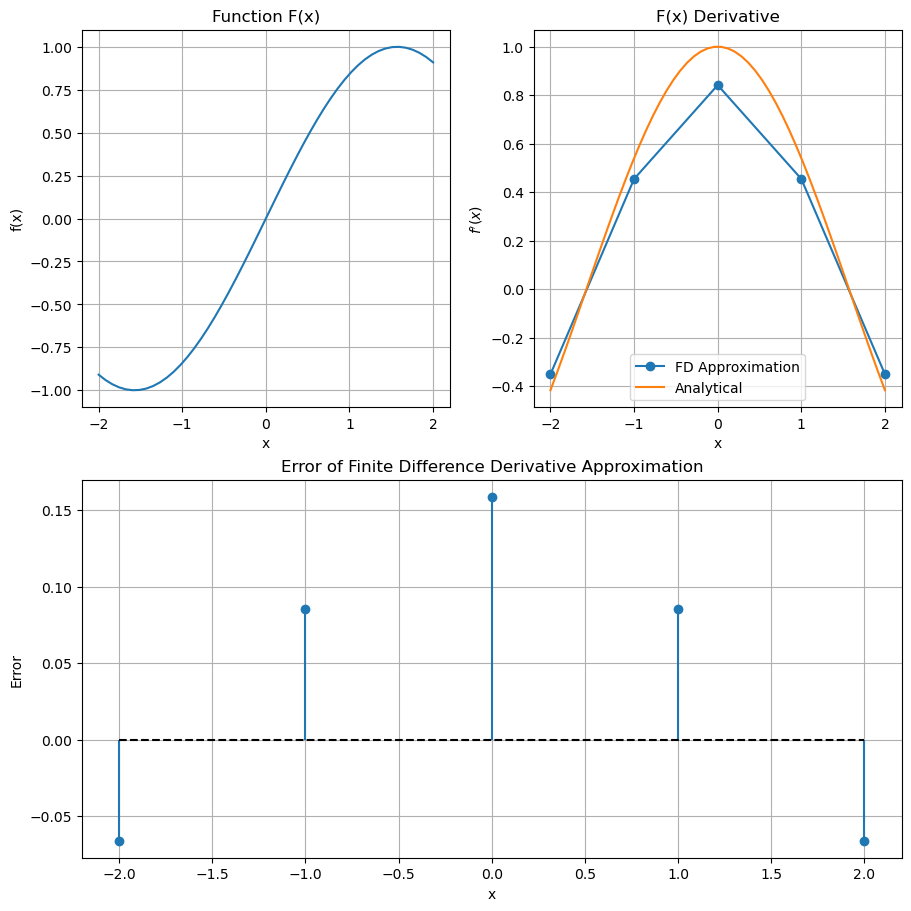

,Property,Quantity
0,l_2 error norm,0.220248
1,mean squared error,0.009702
2,maximum error,0.158529


In [6]:
fig, ax = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'lower left']],
                              figsize=(9,9), layout="constrained")

# f(x) plot
ax['upper left'].plot(xx, f(xx))
ax['upper left'].set(xlabel="x", ylabel="f(x)", title="Function F(x)")
ax['upper left'].grid(True)

# derivative of f(x) plot
ax['right'].plot(xx_h, f_prime_FD, marker="o", label="FD Approximation")
ax['right'].plot(xx, f_prime(xx), label="Analytical")
ax['right'].set(xlabel="x", ylabel=r"$f'(x)$", title="F(x) Derivative")
ax['right'].legend()
ax['right'].grid(True)

# error
error = f_prime(xx_h) - f_prime_FD
ax['lower left'].stem(xx_h, error, basefmt="k--")
ax['lower left'].set(xlabel="x", ylabel="Error", title="Error of Finite Difference Derivative Approximation")
ax['lower left'].grid(True)

# summary
summary = [
    ("l_2 error norm", np.linalg.norm((error))),
    ("mean squared error", np.mean(abs(error)**2)),
    ("maximum error", np.max(abs(error)))
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Quantity"])

plt.show()
df

### Convergence Analysis
Investigate appropriate region of step size $h$ for the finite difference approximation's to be acceptable. This achieved by tracing the error of the approximation for different ranges of $h$.
- Convergence Plot: Trace the error as $h$ changes

In [7]:
H = np.geomspace(0.0001, 1, num=20) 

errors=[]
for h_i in H:
    error = f_prime(2) - FD(f, 2, h_i)
    errors.append(abs(error))

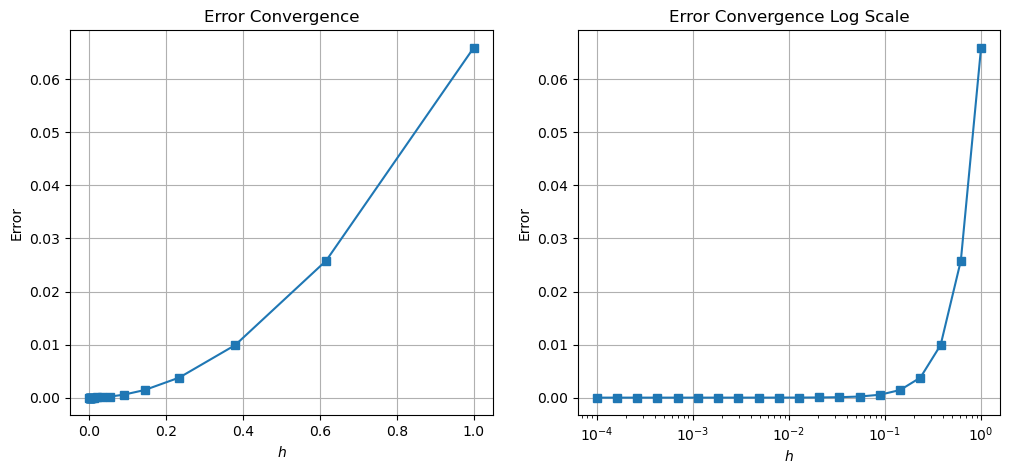

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# convergence
ax[0].plot(H, errors, marker="s")
ax[0].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence")
ax[0].grid(True)

# convergence log scale
ax[1].plot(H, errors, marker="s")
ax[1].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence Log Scale", xscale="log")
ax[1].grid(True)

plt.show()

### Stability and Oscillations